In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
seed_value = 42
tf.random.set_seed(seed_value)

In [3]:
train = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator =train.flow_from_directory(
    'equal/train',
    target_size=(256,256),
    batch_size=32,
    seed=seed_value,
    class_mode='sparse'
    
)

Found 4620 images belonging to 3 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['Overripe', 'Ripe', 'Unripe']

In [5]:
validation= ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_generator =validation.flow_from_directory(
    'equal/val',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 1320 images belonging to 3 classes.


In [6]:
test = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator =test.flow_from_directory(
    'equal/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 660 images belonging to 3 classes.


In [27]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
steps_per_epoch= int((len(train_generator))//32)
print(steps_per_epoch)

e= len(train_generator)
print(e)
epochs=5

4
145


In [ ]:
history= model.fit(
    train_generator,
    batch_size=32,
    epochs= 5,
    validation_data= val_generator,
    validation_steps= 3, 
    verbose=1,
)

Epoch 1/5
134/145 [==========================>...] - ETA: 29s - loss: 0.8662 - accuracy: 0.5291

In [12]:
scores=model.evaluate(test_generator)

21/21 [==============================] - 20s 938ms/step - loss: 0.1755 - accuracy: 0.9455


In [13]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

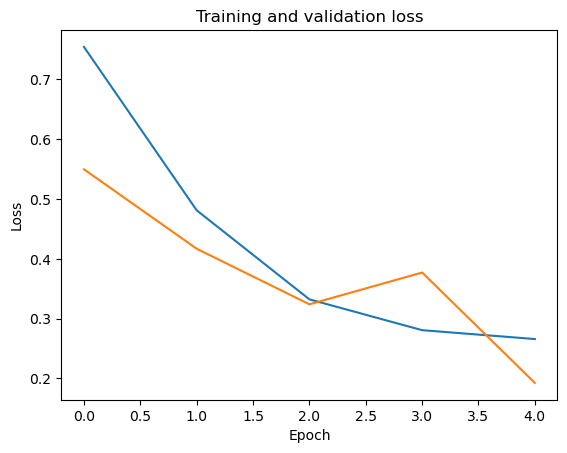

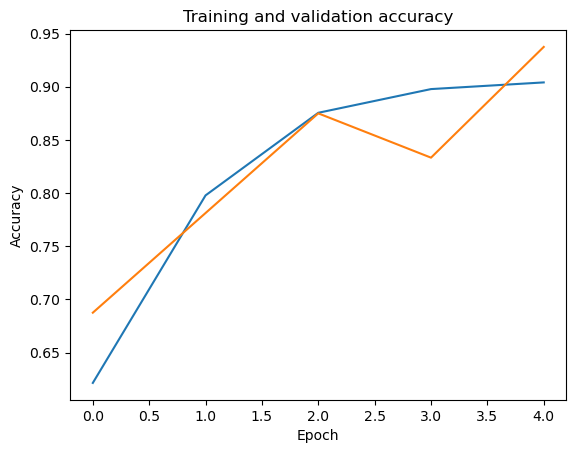

In [14]:
epochs=5
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

first image to predict
actual label: Overripe
1/1 [==============================] - 0s 456ms/step
predicted label: Overripe


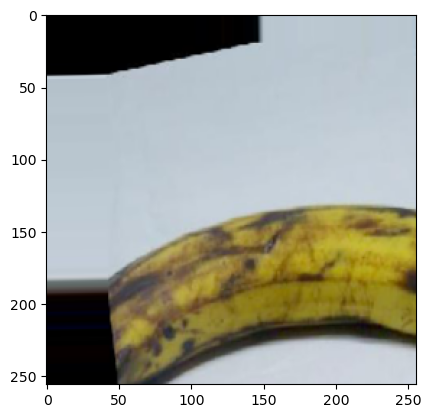

In [15]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image= image_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict' )
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [16]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


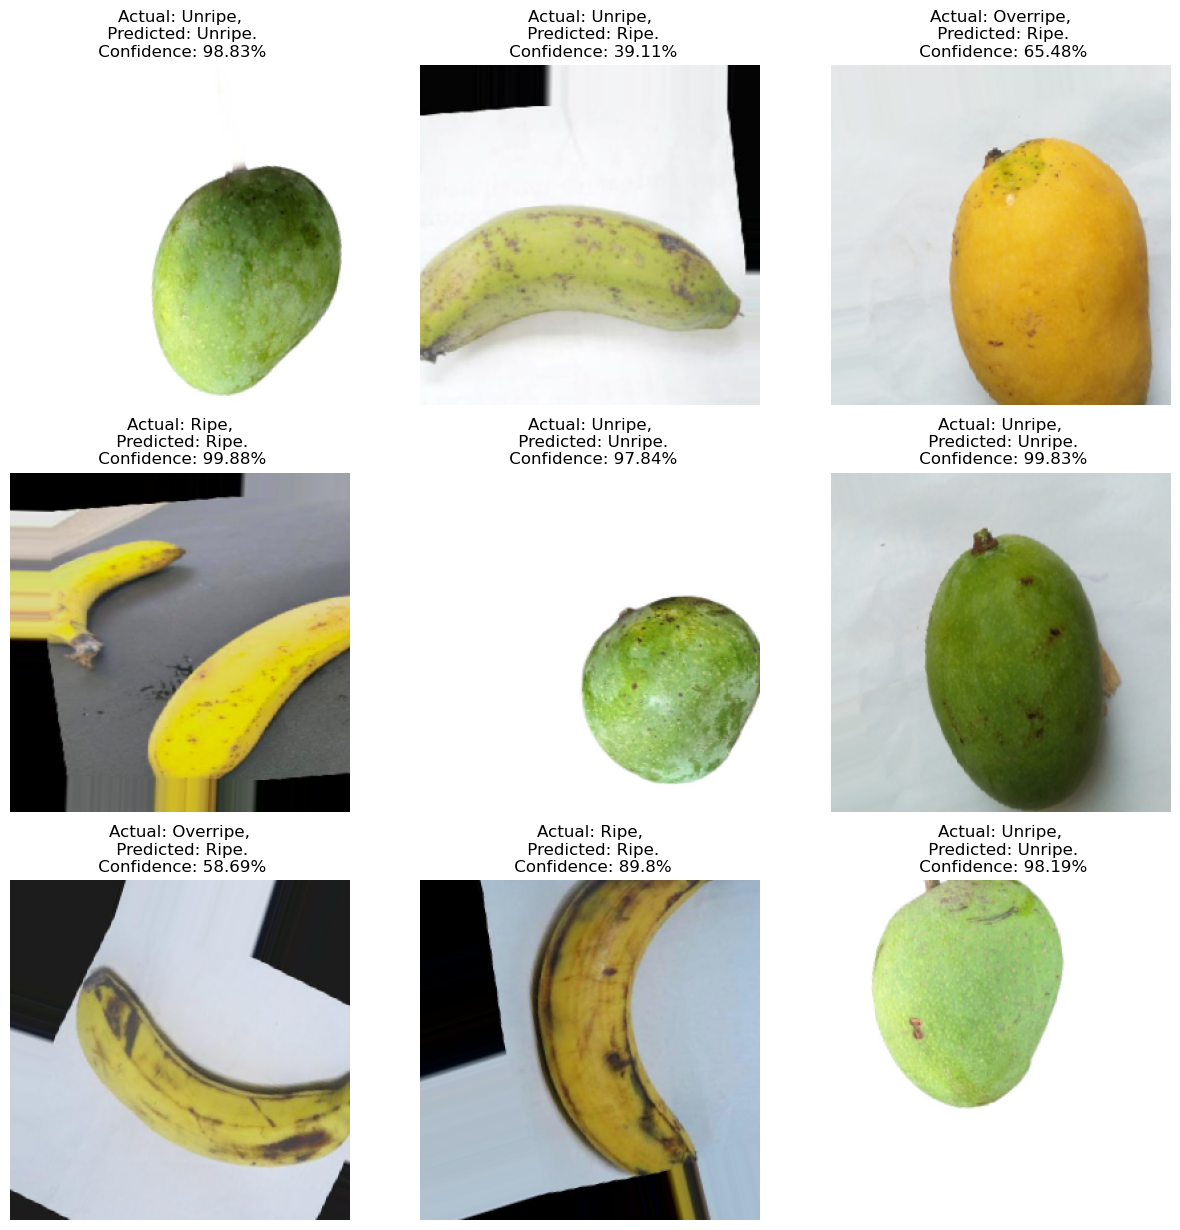

In [17]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [18]:
model.save("equaldataset.h5")

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
predictions = model.predict(train_generator)
true_labels = train_generator.classes
predicted_classes = np.argmax(predictions, axis=1)

145/145 [==============================] - 380s 3s/step


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_classes = np.argmax(predictions, axis=1)

precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print("\nClassification Report:\n", classification_report(true_labels, predicted_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.33      0.34      1540
           1       0.34      0.36      0.35      1540
           2       0.34      0.34      0.34      1540

    accuracy                           0.34      4620
   macro avg       0.34      0.34      0.34      4620
weighted avg       0.34      0.34      0.34      4620



In [21]:
from keras.models import load_model

saved_model = load_model('equaldataset.h5')

train_loss, train_acc = saved_model.evaluate(train_generator, verbose=0)
val_loss, val_acc = saved_model.evaluate(val_generator , verbose=0)


In [22]:
test_loss, test_acc = saved_model.evaluate(test_generator, verbose=0)

print(f'Train accuracy: {train_acc*100:.3f}')
print (f'Validation accuracy: {val_acc*100:.3f}')
print (f'Test accuracy: {test_acc*100:.3f}')
print(f'Train loss: {train_loss:.3f}')
print(f'Validation loss: {val_loss:.3f}')
print(f'Test loss: {test_loss:.3f}')

Train accuracy: 93.723
Validation accuracy: 93.333
Test accuracy: 93.636
Train loss: 0.190
Validation loss: 0.197
Test loss: 0.196


42/42 [==============================] - 30s 711ms/step


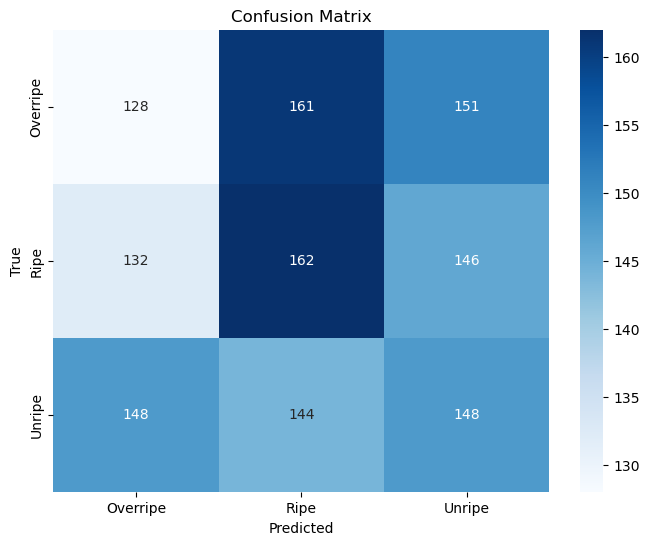

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_generator.reset()  
y_true = val_generator.classes  

y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices,
            yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
